In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")

import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Padam-0/cluster_t-shirt_sizing/master/data.csv') 

# I'm dropping this column because it's redundant with index 
df2 = df.drop(['PERSON #'], axis=1)
df2.head()

,WEIGHT,STATURE,VERTICAL GRIP REACH,FRONTAL GRIP REACH,LATERAL GRIP REACH,STEP HEIGHT,SUPINE STATURE,STANDING CENTER OF GRAVITY,ERECT SITTING HEIGHT,EYE HEIGHT (SEATED),...,BIRTH ORDER,MOTHERS OCCUPATION,FATHERS OCCUPATION,MOTHERS EDUCATION,FATHERS EDUCATION,YEARS IN COMMUNITY,COMMENT CODES,ANTHROPOMETER NO,CALIPER NO,GIRTH NO
0,155,1033,0,0,0,0,0,0,582,451,...,1,7,7,4,4,23,0,1,0,1
1,176,1039,1238,518,651,420,0,0,606,0,...,1,7,7,4,4,7,0,1,0,1
2,230,1112,0,0,0,0,0,0,594,495,...,1,7,7,4,4,6,0,1,0,1
3,165,997,1146,496,0,350,0,0,542,0,...,1,11,9,3,4,4,0,1,0,1
4,150,997,0,0,0,0,0,0,524,449,...,1,7,7,4,4,5,0,1,0,1


                                  WEIGHT   STATURE  VERTICAL GRIP REACH  \
WEIGHT                          1.000000  0.914150             0.127937   
STATURE                         0.914150  1.000000             0.140796   
VERTICAL GRIP REACH             0.127937  0.140796             1.000000   
FRONTAL GRIP REACH              0.118224  0.125855             0.983330   
LATERAL GRIP REACH              0.128282  0.134076             0.980045   
STEP HEIGHT                     0.113387  0.134049             0.966147   
SUPINE STATURE                  0.130446  0.146893             0.698084   
STANDING CENTER OF GRAVITY      0.126355  0.142944             0.697279   
ERECT SITTING HEIGHT            0.784402  0.815742             0.126308   
EYE HEIGHT (SEATED)             0.117415  0.123423            -0.451610   
MAXIMUM HIP BREADTH (SEATED)    0.789531  0.743919             0.132519   
MAXIMUM THIGH BREADTH (SEATED)  0.139137  0.131316            -0.435127   
THIGH CLEARENCE          

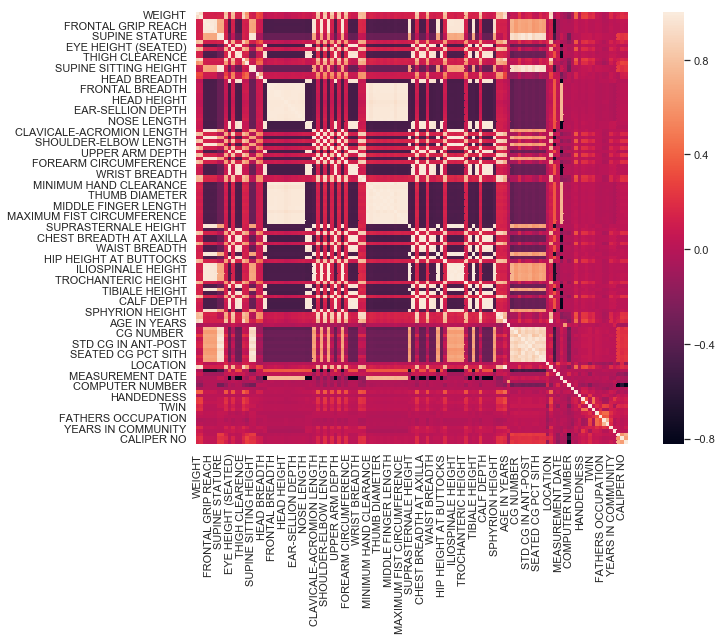

In [3]:
# Make the correlation matrix.
corrmat = df2.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=1, square=True)
plt.tight_layout()
plt.savefig('Naive CorrMat on full dataset.png', dpi=300)
plt.show()

In [4]:
# PCA from 127 features to 2
from sklearn.decomposition import PCA
from sklearn import preprocessing

scaled_data = preprocessing.scale(df2)
X = scaled_data
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf.head()

C:\Users\Zack\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  """


,principal component 1,principal component 2
0,-1.485623,5.379403
1,3.624068,-0.940581
2,-1.484788,5.742301
3,3.592048,-0.954511
4,-1.384165,5.118300


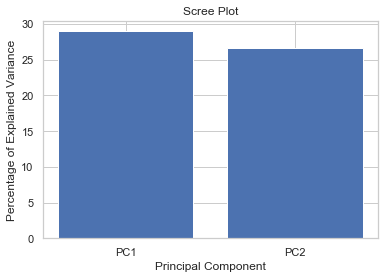

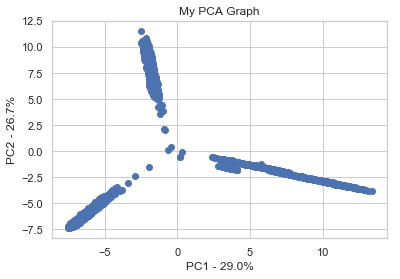

In [5]:
#The following code constructs the Scree plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.savefig('Scree_Plot.png', dpi=300)
plt.show()
 
#the following code makes a fancy looking plot using PC1 and PC2
pca_df = pd.DataFrame(principalComponents, columns=labels)
 
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
#for sample in pca_df.index:
   # plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
plt.savefig('My PCA Graph.png', dpi=300) 
plt.show()


Coefficients: 
 [[0.10280314 0.28627813]]

Intercept: 
 [683.8674359]

Mean (SD) Cross Validation Score: -0.19 (+/- 0.54)

Cross Validation Scores:
[-0.01256469 -0.00635109 -0.6005737  -0.01013481 -0.0565888  -0.71753547
 -0.02282485 -0.44917809 -0.01019453 -0.00846391]


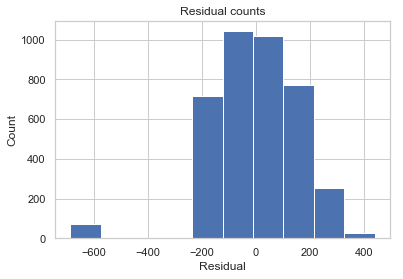

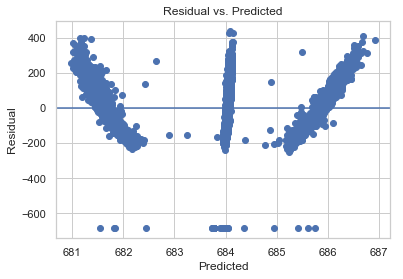

In [6]:
# Linear Regression on PCA
from sklearn import linear_model

# Instantiate and fit our model.
regr = linear_model.LinearRegression()

X = principalComponents
Y = df['CHEST CIRCUMFERENCE'].values.reshape(-1, 1)
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)

# Cross validation
score = cross_val_score(regr, X, Y, cv=10)

print("\nMean (SD) Cross Validation Score: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
print('\nCross Validation Scores:')
print(score)

# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = df['CHEST CIRCUMFERENCE']

# Calculate the error, also called the residual.
residual = actual - predicted

# Plot Residual counts
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.savefig('Residual Counts PCA OLS.png', dpi=300) 
plt.show()

# Plot residual v predicted
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.savefig('Scedacity PCA OLS.png', dpi=300) 
plt.show()


Coefficients: 
 [[0.17910008 0.57418149]]

Intercept: 
 [686.06952857]

Mean (SD) Cross Validation Score: -0.01 (+/- 0.01)

Cross Validation Scores:
[-0.00491325 -0.00075379 -0.00240792 -0.02507811 -0.00241793 -0.00878806
 -0.00721271 -0.00543992 -0.01643375 -0.00091462]


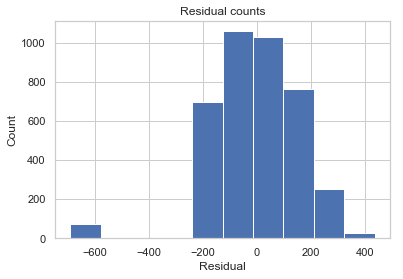

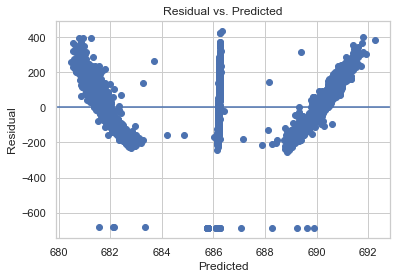

In [8]:
# Is it any better with a holdback?
from sklearn.model_selection import train_test_split

# Linear Regression on PCA
from sklearn import linear_model

# Instantiate and fit our model.
regr = linear_model.LinearRegression()

X = principalComponents
Y = df['CHEST CIRCUMFERENCE'].values.reshape(-1, 1)

# Creating my training data
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42)

regr.fit(X_train, Y_train)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)

# Cross validation
score = cross_val_score(regr, X_train, Y_train, cv=10)

print("\nMean (SD) Cross Validation Score: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
print('\nCross Validation Scores:')
print(score)

# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = df['CHEST CIRCUMFERENCE']

# Calculate the error, also called the residual.
residual = actual - predicted

# Plot Residual counts
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.savefig('Residual Counts PCA OLS Holdback.png', dpi=300) 
plt.show()

# Plot residual v predicted
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.savefig('Scedacity PCA OLS Holdback.png', dpi=300) 
plt.show()

### OLS is not performing well, even after a PCA transformation.


### I am going to see if performance improves with more advanced linear regression via Ridge and Lasso.

### First I'll do some feature selection. 

In [9]:
# Feature selection
from sklearn.feature_selection import VarianceThreshold
X = df2.loc[:, df2.columns != 'CHEST CIRCUMFERENCE']
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
variance_threshold = sel.fit_transform(X)


R-squared:
0.9292806703578382

Mean (SD) Cross Validation Score: 0.91 (+/- 0.07)

Cross Validation Scores:
[0.92417886 0.89615936 0.96196651 0.88830188 0.95553481 0.85871131
 0.87568767 0.91799441 0.92884319 0.85753236]


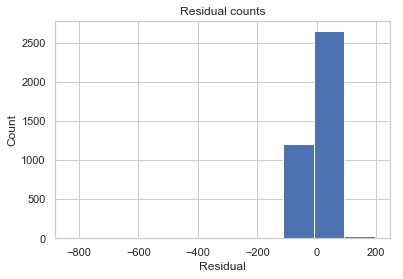

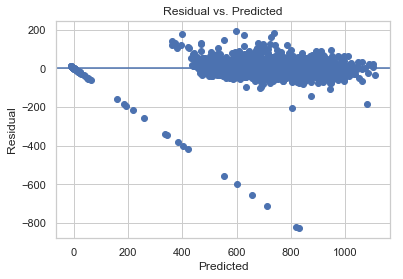

In [30]:
# OLS Regression
X = variance_threshold
Y = df['CHEST CIRCUMFERENCE'].values.reshape(-1, 1)

# Creating my training data
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42)

regr1 = linear_model.LinearRegression()
regr1.fit(X_train, Y_train)
print('\nR-squared:')
print(regr1.score(X_train, Y_train))

# Cross validation

score = cross_val_score(regr1, X_train, Y_train, cv=10)

print("\nMean (SD) Cross Validation Score: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
print('\nCross Validation Scores:')
print(score)

# Extract predicted values.
predicted = regr1.predict(X).ravel()
actual = df['CHEST CIRCUMFERENCE']

# Calculate the error, also called the residual.
residual = actual - predicted

# Plot Residual counts
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.savefig('Residual Counts OLS2.png', dpi=300) 
plt.show()

# Plot residual v predicted
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.savefig('Scedacity OLS2.png', dpi=300) 
plt.show()

R² for the Lasso model:
0.9344976448156948

Mean (SD) Cross Validation Score: 0.90 (+/- 0.12)

Cross Validation Scores:
[0.90998188 0.89776158 0.85656049 0.93262919 0.96017252 0.93278074
 0.93688798 0.95428885 0.75239575 0.83199478]


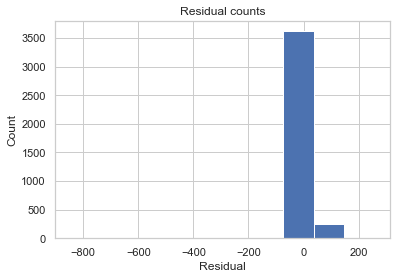

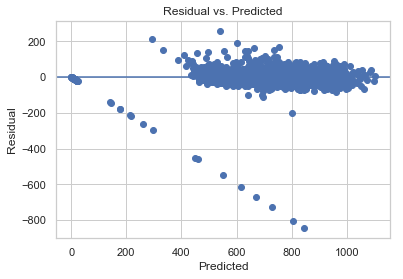

In [19]:
X = df2.loc[:, df2.columns != 'CHEST CIRCUMFERENCE']
Y = df['CHEST CIRCUMFERENCE']

lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X, Y)
print('R² for the Lasso model:')
print(lass.score(X, Y))

# Cross validation

score = cross_val_score(lassfit, X, Y, cv=10)

print("\nMean (SD) Cross Validation Score: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
print('\nCross Validation Scores:')
print(score)

# Extract predicted values.
predicted = lass.predict(X).ravel()
actual = Y

# Calculate the error, also called the residual.
residual = actual - predicted

# Plot Residual distribution
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.savefig('Residual Counts Lasso.png', dpi=300) 
plt.show()

# Plot Residual vs. Predicted 
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.savefig('Scedacity Lasso.png', dpi=300) 
plt.show()

R² for the Lasso model with few features and training split:
0.9287006332186776

Mean (SD) Cross Validation Score: 0.91 (+/- 0.07)

Cross Validation Scores:
[0.92365674 0.89643927 0.96099374 0.88838359 0.95462356 0.85692628
 0.88055686 0.91485468 0.9294993  0.85771348]


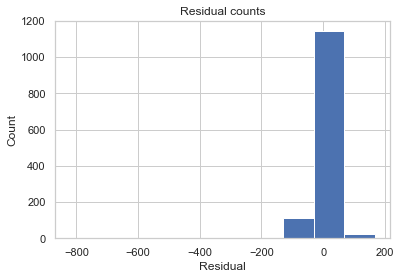

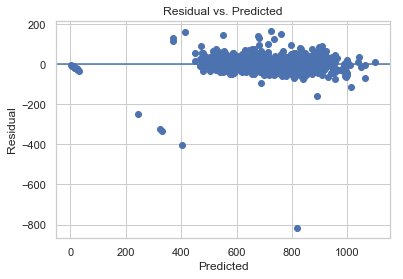

In [26]:
X = df2.loc[:, df2.columns != 'CHEST CIRCUMFERENCE']
Y = df['CHEST CIRCUMFERENCE']

lass = linear_model.Lasso(alpha=.35)

# Creating my training data
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42)

lassfit = lass.fit(X_train, Y_train)
print('R² for the Lasso model with few features and training split:')
print(lass.score(X_train, Y_train))

# Cross validation

score = cross_val_score(lassfit, X_train, Y_train, cv=10)

print("\nMean (SD) Cross Validation Score: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
print('\nCross Validation Scores:')
print(score)

# Extract predicted values.
predicted = lass.predict(X_test).ravel()
actual = Y_test

# Calculate the error, also called the residual.
residual = actual - predicted

# Plot Residual distribution
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.savefig('Residual Counts Lasso Holdback2.png', dpi=300) 
plt.show()

# Plot Residual vs. Predicted 
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.savefig('Scedacity Lasso Holdback2.png', dpi=300) 
plt.show()

R² for the Lasso model with few features and training split:
0.9287006337626486

Mean (SD) Cross Validation Score: 0.91 (+/- 0.07)

Cross Validation Scores:
[0.92365674 0.89643927 0.96099374 0.88838359 0.95462356 0.8569263
 0.88055683 0.91485468 0.9294993  0.85771348]


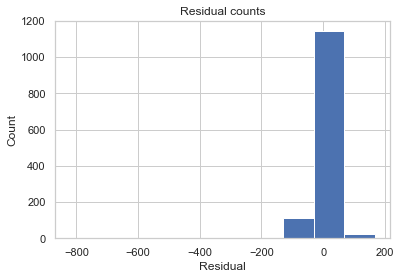

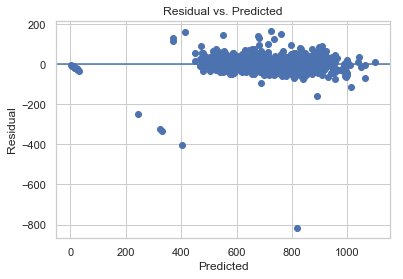

In [31]:
import warnings
warnings.filterwarnings("ignore")

# Lasso Regression
lass = linear_model.Lasso(alpha=.35)
X = variance_threshold
Y = df2['CHEST CIRCUMFERENCE']

# Creating my training data
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42)

lassfit = lass.fit(X_train, Y_train)
print('R² for the Lasso model with few features and training split:')
print(lass.score(X_train, Y_train))

# Cross validation

score = cross_val_score(lassfit, X_train, Y_train, cv=10)

print("\nMean (SD) Cross Validation Score: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
print('\nCross Validation Scores:')
print(score)

# Extract predicted values.
predicted = lass.predict(X_test).ravel()
actual = Y_test

# Calculate the error, also called the residual.
residual = actual - predicted

# Plot Residual distribution
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.savefig('Residual Counts Lasso Holdback.png', dpi=300) 
plt.show()

# Plot Residual vs. Predicted 
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.savefig('Scedacity Lasso Holdback.png', dpi=300) 
plt.show()


R-squared:
0.9291297526191912

Mean (SD) Cross Validation Score: 0.91 (+/- 0.07)

Cross Validation Scores:
[0.92363283 0.89610499 0.96181918 0.88786215 0.95484315 0.85827328
 0.87270731 0.916889   0.93249399 0.85799706]


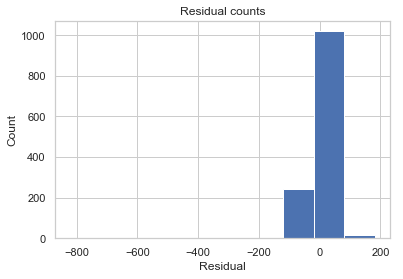

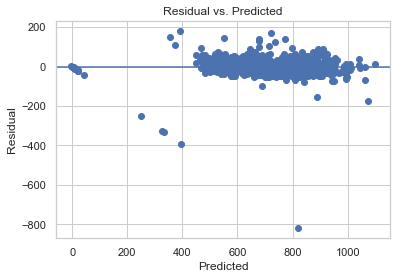

In [21]:
#Ridge Regression
ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False) 
ridgeregr.fit(X_train, Y_train)
print('\nR-squared:')
print(ridgeregr.score(X_train, Y_train))

# Cross validation

score = cross_val_score(ridgeregr, X_train, Y_train, cv=10)

print("\nMean (SD) Cross Validation Score: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
print('\nCross Validation Scores:')
print(score)

# Extract predicted values.
predicted = ridgeregr.predict(X_test).ravel()
actual = Y_test

# Calculate the error, also called the residual.
residual = actual - predicted

# Plot Residual distribution
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.savefig('Residual Counts Ridge.png', dpi=300) 
plt.show()

# Plot Residual vs. Predicted 
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.savefig('Scedacity Ridge.png', dpi=300) 
plt.show()